Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale
%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_dct.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

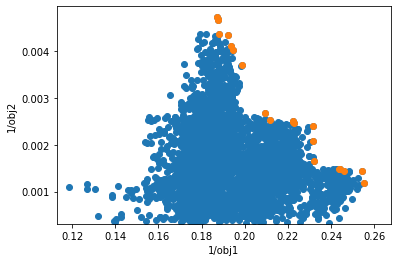

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.004288889664823405


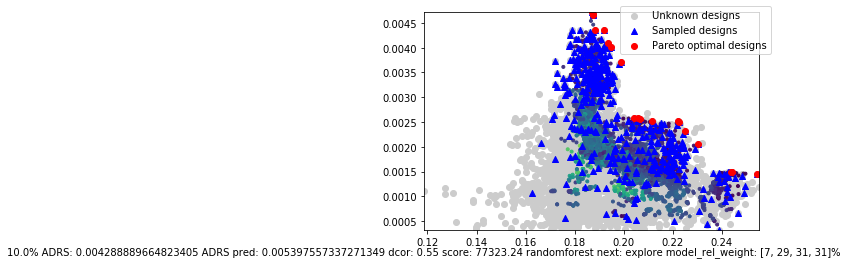

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1365, 1493, 3413, 1367, 1877, 4095,   60,    3,   67,    1,    2,
        258,    0,  828, 1024, 2048, 2816,   64, 1280, 1088, 3072, 1536,
        256,  512,  320,  768,  128, 2304, 3328, 3279,   12, 3840, 2560,
       4083, 3312, 3265, 3135, 1028,  963, 1007,    4,  260, 1284, 2052,
         16,    8, 1040,  272, 3852, 2064, 1296, 4068,  779,  451,  192,
       1344, 2308, 1792,   20, 3088, 2320, 1044,  780,  516,  803,  164,
       3120,  520, 3076, 2112, 3584, 3200,  784,   80,  899, 2240,  783,
         35,   39,   51, 1496, 1304,  200, 3844,   68, 2116,  276, 3136,
        528, 1552, 2128,  532, 1104, 1092, 2568,   84,  800,  576, 3008,
       3720, 1936,  243,   32,  896, 1540, 4044, 3084,  240, 1023,  819,
         50, 3104,  179,  544, 2704, 3728, 2288,  396, 3332,  136,  324,
       3968, 2368,  336, 3344, 2068,  592, 1600,  832, 3392, 3648, 1604,
       2624, 3152, 1360,  672, 1300, 1856,  772, 2576,  340, 2564,  204,
       1348, 1056, 3600,  288, 2880, 1808,   36, 38